# experiments

In [7]:
from sklearn.metrics import log_loss

Flip a single point, influence = change in training error

In [156]:
def calculate_influences_flip(X_train, y_train, clf, gamma):
    influences = []
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    clf.fit(K, y_train)
    orig_loss = log_loss(y_train, clf.predict_proba(K))
#     print(log_loss(y_train, clf.predict_proba(K)), custom_log_loss(y_train, clf.predict_proba(K)[:,1]))
    
    for i in range(X_train.shape[0]):
        y_train_mod = np.copy(y_train)
        y_train_mod[i] = 0 if (y_train_mod[i]==1) else 1 # flip single label
        
        clf.fit(K, y_train_mod)
        mod_loss = log_loss(y_train_mod, clf.predict_proba(K))
        
        influences.append((i, mod_loss - orig_loss))
                
    return influences

In [157]:
influences_flip = calculate_influences_flip(X_train, y_train, clf, gamma)

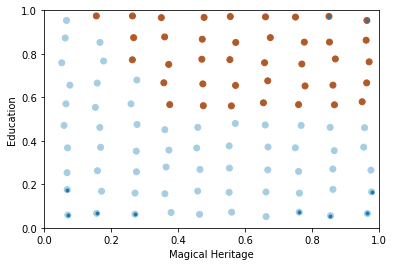

In [158]:
n = 10
top_n = True
# top_n = False
visualize_top_influential_points(X_train, y_train, influences_flip, n, top_n)

Delete a single point, influence = change in training error

In [160]:
def calculate_influences_delete(X_train, y_train, clf, gamma):
    influences = []
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    clf.fit(K, y_train)
    orig_loss = log_loss(y_train, clf.predict_proba(K))
    
    for i in range(X_train.shape[0]):
        X_train_mod = np.delete(X_train, i, 0)
        y_train_mod = np.delete(y_train, i, 0)
        
        K_mod = rbf_kernel(X_train_mod, X_train_mod, gamma=gamma)
        clf.fit(K_mod, y_train_mod)
        mod_loss = log_loss(y_train_mod, clf.predict_proba(K_mod))
        
        influences.append((i, mod_loss - orig_loss))
        
        
    return influences

In [161]:
influences_delete = calculate_influences_delete(X_train, y_train, clf, gamma)

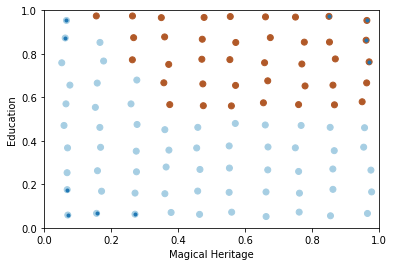

In [162]:
n = 10
top_n = True
# top_n = False
visualize_top_influential_points(X_train, y_train, influences_delete, n, top_n)

Flip one label at a time, influence = change in loss of misclassified trusted items

In [163]:
def custom_log_loss(y_true, y_proba):
    return -np.mean(np.multiply(y_true, np.log(y_proba))+np.multiply(1-y_true, np.log(1-y_proba)))

In [164]:
def calculate_influences_on_trust_flip(X_train, y_train, X_trust, y_trust, clf, gamma):
    influences = []
    
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    K_trust = rbf_kernel(X_trust, X_train, gamma=gamma)
    clf.fit(K, y_train)
    
    y_trust_pred = clf.predict(K_trust)
    l = []
    for i in range(len(y_trust)):
        if y_trust_pred[i] != y_trust[i]:
            l.append(i)
    X_trust_misclassified = X_trust[l]
    y_trust_misclassified = y_trust[l]
    
    K_trust_misclassified = rbf_kernel(X_trust_misclassified, X_train, gamma=gamma)
    orig_loss = -custom_log_loss(y_trust_pred[l], clf.predict_proba(K_trust_misclassified)[:,1])
    
    for i in range(X_train.shape[0]):
        y_train_mod = np.copy(y_train)
        y_train_mod[i] = 0 if (y_train_mod[i]==1) else 1 # flip single label
        
        clf.fit(K, y_train_mod)
        
        y_trust_pred = clf.predict(K_trust)
        l = []
        for j in range(len(y_trust)):
            if y_trust_pred[j] != y_trust[j]:
                l.append(j)
        X_trust_misclassified = X_trust[l]
        y_trust_misclassified = y_trust[l]

        K_trust_misclassified = rbf_kernel(X_trust_misclassified, X_train, gamma=gamma)
        
        mod_loss = -custom_log_loss(y_trust_pred[l], clf.predict_proba(K_trust_misclassified)[:,1])
#         print(y_trust,y_trust_pred[l],y_trust_misclassified,clf.predict_proba(K_trust_misclassified)[:,1])
        
        influences.append((i, mod_loss - orig_loss))
                
    return influences

In [165]:
influences_flip_trust = calculate_influences_on_trust_flip(X_train, y_train, X_trust, y_trust,clf, gamma)

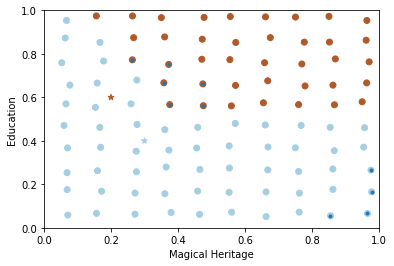

In [166]:
n = 10
top_n = True
# top_n = False
visualize_top_influential_points(X_train, y_train, influences_flip_trust, n, top_n, X_trust, y_trust)

In [167]:
def calculate_influences_on_trust_delete(X_train, y_train, X_trust, y_trust, clf, gamma):
    influences = []
    
    K = rbf_kernel(X_train, X_train, gamma=gamma)
    K_trust = rbf_kernel(X_trust, X_train, gamma=gamma)
    clf.fit(K, y_train)
    
    y_trust_pred = clf.predict(K_trust)
    l = []
    for i in range(len(y_trust)):
        if y_trust_pred[i] != y_trust[i]:
            l.append(i)
    X_trust_misclassified = X_trust[l]
    y_trust_misclassified = y_trust[l]
    
    K_trust_misclassified = rbf_kernel(X_trust_misclassified, X_train, gamma=gamma)
    orig_loss = -custom_log_loss(y_trust_pred[l], clf.predict_proba(K_trust_misclassified)[:,1])
    
    for i in range(X_train.shape[0]):
        X_train_mod = np.delete(X_train, i, 0)
        y_train_mod = np.delete(y_train, i, 0)
        
        K_mod = rbf_kernel(X_train_mod, X_train_mod, gamma=gamma)
        K_trust = rbf_kernel(X_trust, X_train_mod, gamma=gamma)
        clf.fit(K_mod, y_train_mod)
        
        y_trust_pred = clf.predict(K_trust)
        l = []
        for j in range(len(y_trust)):
            if y_trust_pred[j] != y_trust[j]:
                l.append(j)
        X_trust_misclassified = X_trust[l]
        y_trust_misclassified = y_trust[l]
        K_trust_misclassified = K_trust[l]
        
        mod_loss = -custom_log_loss(y_trust_pred[l], clf.predict_proba(K_trust_misclassified)[:,1])
#         print(y_trust,y_trust_pred[l],y_trust_misclassified,clf.predict_proba(K_trust_misclassified)[:,1])
        
        influences.append((i, mod_loss - orig_loss))
                
    return influences

In [168]:
influences_delete_trust = calculate_influences_on_trust_delete(X_train, y_train, X_trust, y_trust,clf, gamma)

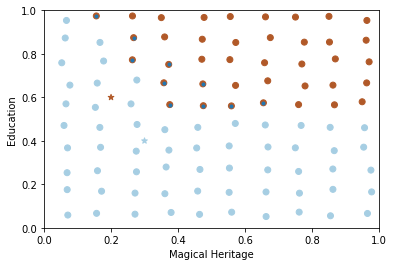

In [169]:
n = 10
top_n = True
# top_n = False
visualize_top_influential_points(X_train, y_train, influences_delete_trust, n, top_n, X_trust, y_trust)

# plotting

Plotting clusters...

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import rbf_kernel

In [152]:
def visualize_top_influential_points(X_train, y_train, influences, n, top_n=True, X_trust=None, y_trust=None):
    influences.sort(key=lambda x:x[1], reverse=top_n)
    top_influence_indices = [i[0] for i in influences[:n]]
    
    top_influence_X = X_train[top_influence_indices,:]
    top_influence_y = y_train[top_influence_indices]
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o')
    
    plt.scatter(top_influence_X[:, 0], top_influence_X[:, 1], marker='.')
    
    if X_trust is not None:
        plt.scatter(X_trust[:, 0], X_trust[:, 1], c=y_trust, cmap=plt.cm.Paired, marker='*')
    
    plt.xlabel('Magical Heritage')
    plt.ylabel('Education')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.draw()

In [14]:
# ----------------------------------------
# For plotting data and decision boundary
def plot_model(X_train, y_train, clf, sigma, X_trust=None, y_trust=None, title=None, 
													train_cluster_labels=None, trust_cluster_labels=None):

	X = np.zeros((10000,2))
	a = np.linspace(0,1,100)
	b = np.linspace(0,1,100)
	e, d = np.meshgrid(a, b)
	X[:,0] = np.reshape(e,(10000,))
	X[:,1] = np.reshape(d,(10000,))

	K = rbf_kernel(X, X_train, gamma=(-1/(2.0*sigma**2)))
	Z = clf.predict(K)
	probs = clf.predict_proba(K)[:, 1].reshape(e.shape)

	plt.figure()

	# Put the result into a color plot
	Z = Z.reshape(e.shape)
	plt.contour(e, d, probs, levels=[0.5])

	# Plot clusters
	if train_cluster_labels is not None:
		if trust_cluster_labels is not None:
			cluster_labels = np.concatenate([train_cluster_labels,trust_cluster_labels])
			X = np.vstack([X_train, X_trust])
			plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, marker='o', s=80)
		else:
			plt.scatter(X_train[:, 0], X_train[:, 1], c=train_cluster_labels, marker='o', s=80)

	# Plot the training points
	plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, marker='.')
	
	# Plot the trusted points
	if X_trust is not None:
		plt.scatter(X_trust[:, 0], X_trust[:, 1], c=y_trust, cmap=plt.cm.Paired, marker='X')

	if title is not None:
		plt.title(str(title))

	plt.xlabel('Magical Heritage')
	plt.ylabel('Education')
	plt.xlim(0, 1)
	plt.ylim(0, 1)
	plt.draw()

# HarryPotter

In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import rbf_kernel

In [2]:
# for reproducibility, fix the random seed 
np.random.seed(123)

# the learner is hard coded to be kernel logistic regression.
# learner's parameters:
lam = 1e-3	# L2 regularization weight of learner
sigma = 0.4	# RBF kernel bandwidth
gamma = (-1/(2.0*sigma**2))

In [3]:
################### Harry Potter Toy Example ##################

# ----------------------------------------
# Generate "dirty" training data. 
# that is, we will plant some "historical bias" 
# in the form of labels: the Ministry of Magic refused to hire
# muggle-born graduates with high edcuation.

print("Creating training data...\n")

# Training Set size
n = 100 

# data points are on a uniform grid, then dithered with a Gaussian.
# x_1=magic heritage; x_2=education

X_train = np.zeros((n,2))
a = np.linspace(0.05, 0.95, num=int(np.sqrt(n)))
e, d = np.meshgrid(a, a)
X_train[:,0] = np.reshape(e,(n,))
X_train[:,1] = np.reshape(d,(n,))
X_train = X_train + 0.03*np.random.rand(n,2)
# print(X_train)

# the noiseless 'desired' label obeys y = sign(x_2 - 0.5)
y_clean = np.sign(X_train[:,1]-0.5)
# print(y_clean)

y_train = np.copy(y_clean)
y_train[(X_train[:,1]<(4*(X_train[:,0]-0.5)**2+0.5)) & (X_train[:,0]<0.5)] = -1
# print(y_train-y_clean)

Creating training data...



In [4]:
# --------------------------------------------------------------
# Generate trusted data
# we manually picked these two trusted items for pedagogical purpose
print("Creating trusted data...\n")

X_trust = np.array([[0.3, 0.4],[0.2, 0.6]])
y_trust = np.sign(X_trust[:,1]-0.5)
m = y_trust.shape[0]
c_value = 100  # Confidence parameters on trusted items are set to 100.
c = c_value*np.ones((m,1))

Creating trusted data...



In [27]:
y_train[y_train==-1] = 0
y_trust[y_trust==-1] = 0

In [5]:
print(X_train.shape, X_trust.shape)

(100, 2) (2, 2)


In [6]:
clf = LogisticRegression(solver='lbfgs', C=lam)